# Py Spark experimentation

In [1]:
import pyspark

## Spark Context

Spark Context is the key entry point for Spark as it represents the connection to a Spark Cluster and can manipulate the cluster. Using Py4J it serves as a bridge between python and Java so that it your python code can interact with the Java SparkContext (how it was originally written). The Conext acts as a main (formerly master) node of the Sparke application. Only one SparkContext can be created per python kernel

In [2]:
sc = pyspark.SparkContext('local[*]')
type(sc)


# sc.parallelize(range(1000)).count()
# rdd = sc.parallelize(range(1000))
# rdd.takeSample(False,5)

pyspark.context.SparkContext

In [3]:
print('Current Version of Spark: ', sc.version)
print('Default number of cores in use: ', sc.defaultParallelism)
print('Current Application Name: ', sc.appName)
print('Current app id: ', sc.applicationId)

Current Version of Spark:  2.4.0
Default number of cores in use:  8
Current Application Name:  pyspark-shell
Current app id:  local-1611436112913


In [4]:
#all config settings for pyspark
sc._conf.getAll()

[('spark.driver.port', '53567'),
 ('spark.app.id', 'local-1611436112913'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', 'mitchells-mbp.lan'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell')]

In [5]:
# ends spark context
sc.stop()

## Reseilient Distributed Datasets (RDDs) 

RDDs are the fundamental data structure of Spark. RDDs are a representation of a set of data spread across multiple machines. They are:
- **Resilient:** RDDs have built-in fault tolerance meaning that if a node goes offline the RDD will still be able to restore data
- **Distributed:** Data in RDDs are partitioned across multiple nodes of a cluster
- **Immutable:** Once created it cannot be modified
- **Lazily Evaluated:** RDDs are not evaluated until explicitly called. When they are created, they are programed to perform an action but it will not be activated until called (allows for organization into smaller actions to help with speed and memory useage on large quantities)
- **In Memory:** Operations are performed in memory not in the database (allows for speed with large quantities of data)

### Transformations & Actions

Every transformation on an RDD creates a new RDD becuase RDDs are immutable, however, it is not executed until an action is called (lazy evaluation). Actions return final results of computations on RDDs and execute using the lineage graph of the original RDD.

### RDD Example

In [6]:
#generate a simple data set
data = list(range(1,1001))

#create spark context
sc = pyspark.SparkContext('local[*]')

# create rdd with 10 partions
rdd = sc.parallelize(data, numSlices=10)
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [7]:
#check number of partitions
rdd.getNumPartitions()

10

In [8]:
#simple actions on RDD
print('Count: ', rdd.count()) #counts total number of items in RDD
print('First: ', rdd.first()) #returns first item in RDD
print('Take: ', rdd.take(10)) #returns first n items in RDD
print('Top: ', rdd.top(10)) #returns top/last n items in RDD
print('Collect', rdd.collect()) #returns everything in RDD

Count:  1000
First:  1
Take:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Top:  [1000, 999, 998, 997, 996, 995, 994, 993, 992, 991]
Collect [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

***
Simulate Data in RDD by multiplying each value in RDD with a random values between 0 & 1

In [20]:
import random 
import numpy as np

nums = np.array(range(1,1001))
data = nums * np.random.rand(1000)

#convert numpy array to RDD
rdd2 = sc.parallelize(data, numSlices=10)

Let's say every item in `rdd2` is a price. Calculate reveue afater 6% Sales tax is taken out:
 - Note `.map()` is a transformer and isn't executed until an actional is called

In [23]:
def sales_tax(num):
    return num*.94

revenue_after_tax = rdd2.map(sales_tax)
revenue_after_tax.top(10)

[920.922635608762,
 899.7650874927601,
 887.1885961828942,
 882.160165561848,
 867.6439348908704,
 859.5777504999264,
 854.8428118295329,
 844.9590061343738,
 836.0707910494224,
 805.3793290190358]

This can also be written using lamda function and chained

In [26]:
rdd2.map(lambda x: x*.94).top(10)

[920.922635608762,
 899.7650874927601,
 887.1885961828942,
 882.160165561848,
 867.6439348908704,
 859.5777504999264,
 854.8428118295329,
 844.9590061343738,
 836.0707910494224,
 805.3793290190358]

You can check the lineage (history) of RDD by using `.toDebugString()`

In [28]:
print(type(revenue_after_tax))
revenue_after_tax.toDebugString()

<class 'pyspark.rdd.PipelinedRDD'>


b'(10) PythonRDD[15] at RDD at PythonRDD.scala:53 []\n |   ParallelCollectionRDD[9] at parallelize at PythonRDD.scala:195 []'

**Filtering RDD**

Select data only over 700:

In [31]:
revenue_after_tax.filter(lambda x: x>700).collect()

[713.2285092059581,
 719.4677646887501,
 711.5660989847064,
 725.6319954594144,
 736.9365214933705,
 733.1775711775091,
 775.5479542395877,
 779.1892613014345,
 743.5768787471984,
 704.3177702135096,
 768.3174956411926,
 773.6290049606705,
 724.9164486069786,
 836.0707910494224,
 795.5671053501165,
 743.7546089114387,
 792.7242454863291,
 749.3983301770306,
 747.8439083674739,
 728.6675685934113,
 859.5777504999264,
 844.9590061343738,
 867.6439348908704,
 882.160165561848,
 887.1885961828942,
 764.8199474344743,
 899.7650874927601,
 781.3253976694737,
 854.8428118295329,
 805.3793290190358,
 920.922635608762]

## Text Analysis using Spark

Pull hamlet from Project Gutenberg 

In [36]:
from pyspark import SparkFiles
url = 'https://www.gutenberg.org/files/1524/1524-0.txt'
sc.addFile(url)
hamlet = sc.textFile("file://"+SparkFiles.get('1524-0.txt'))

The 1000th line of the text file

In [40]:
print(hamlet.collect()[1000])

HAMLET. Hillo, ho, ho, boy! Come, bird, come.


Print Entire Document

In [41]:
for line in hamlet.collect():
    print(line)


Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no
restrictions whatsoever.  You may copy it, give it away or re-use it
under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org.  If you are not located in the
United States, you’ll have to check the laws of the country where you
are located before using this ebook.



Title: Hamlet

Author: William Shakespeare

Release Date: November 1998 [EBook #1524]
Last Updated: September 30, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***



This etext was prepared by Dianne Bean.


THE TRAGEDY OF HAMLET, PRINCE OF DENMARK




by William Shakespeare






Contents

ACT I
Scene I. Elsinore. A platform before the Castle.
Scene II. Elsinore. A room of state in the Castle
Scene III. A room in Polonius’s house

### MapReduce

Map: Split into tuples of words and a single count, then clean by lowercase and strip punctuation

In [73]:
import string
words = hamlet.flatMap(lambda x:x.split(" "))
words = words.map(lambda x:(x.lower().translate(str.maketrans(" "," ",string.punctuation)),1))

In [74]:
words.collect()[500:575]

[('barnardo', 1),
 ('have', 1),
 ('you', 1),
 ('had', 1),
 ('quiet', 1),
 ('guard', 1),
 ('', 1),
 ('francisco', 1),
 ('not', 1),
 ('a', 1),
 ('mouse', 1),
 ('stirring', 1),
 ('', 1),
 ('barnardo', 1),
 ('well', 1),
 ('good', 1),
 ('night', 1),
 ('if', 1),
 ('you', 1),
 ('do', 1),
 ('meet', 1),
 ('horatio', 1),
 ('and', 1),
 ('marcellus', 1),
 ('the', 1),
 ('rivals', 1),
 ('of', 1),
 ('my', 1),
 ('watch', 1),
 ('bid', 1),
 ('them', 1),
 ('make', 1),
 ('haste', 1),
 ('', 1),
 ('', 1),
 ('enter', 1),
 ('horatio', 1),
 ('and', 1),
 ('marcellus', 1),
 ('', 1),
 ('francisco', 1),
 ('i', 1),
 ('think', 1),
 ('i', 1),
 ('hear', 1),
 ('them', 1),
 ('stand', 1),
 ('ho', 1),
 ('who', 1),
 ('is', 1),
 ('there', 1),
 ('', 1),
 ('horatio', 1),
 ('friends', 1),
 ('to', 1),
 ('this', 1),
 ('ground', 1),
 ('', 1),
 ('marcellus', 1),
 ('and', 1),
 ('liegemen', 1),
 ('to', 1),
 ('the', 1),
 ('dane', 1),
 ('', 1),
 ('francisco', 1),
 ('give', 1),
 ('you', 1),
 ('good', 1),
 ('night', 1),
 ('', 1),
 ('mar

Reduce: combine keys and eliminate spaces, stopwords, and rare words.

In [75]:
wordCount = words.reduceByKey(lambda x,y:x+y)
wordCount.take(10)

[('', 1765),
 ('project', 89),
 ('gutenberg', 31),
 ('ebook', 13),
 ('of', 800),
 ('shakespeare', 4),
 ('this', 347),
 ('is', 362),
 ('use', 27),
 ('anyone', 5)]

In [78]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mitchellkrieger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
cleanWordCount = wordCount.filter(lambda x: x[1] >=5).filter(lambda x: x[0] not in stop_words).filter(lambda x: x[0] is not '')

#then sort
sortedwords = cleanWordCount.sortBy(lambda x: x[1], ascending=False)
sortedwords.take(50)

[('hamlet', 464),
 ('lord', 220),
 ('king', 194),
 ('horatio', 154),
 ('polonius', 120),
 ('queen', 117),
 ('shall', 116),
 ('come', 106),
 ('good', 105),
 ('laertes', 104),
 ('thou', 102),
 ('let', 94),
 ('project', 89),
 ('may', 86),
 ('ophelia', 86),
 ('thy', 86),
 ('like', 80),
 ('would', 79),
 ('rosencrantz', 78),
 ('us', 77),
 ('know', 75),
 ('well', 74),
 ('’tis', 73),
 ('sir', 72),
 ('go', 70),
 ('must', 69),
 ('enter', 68),
 ('guildenstern', 66),
 ('love', 66),
 ('hath', 64),
 ('give', 63),
 ('first', 63),
 ('speak', 62),
 ('make', 58),
 ('thee', 58),
 ('i’ll', 57),
 ('upon', 56),
 ('gutenbergtm', 56),
 ('work', 55),
 ('say', 53),
 ('father', 51),
 ('man', 51),
 ('much', 50),
 ('see', 48),
 ('marcellus', 47),
 ('clown', 47),
 ('think', 46),
 ('one', 45),
 ('scene', 44),
 ('heaven', 43)]

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql as sparksql

In [107]:
sql_context = sparksql.SQLContext(sc)
df = sql_context.createDataFrame(sortedwords)
df.show()

+-----------+---+
|         _1| _2|
+-----------+---+
|     hamlet|464|
|       lord|220|
|       king|194|
|    horatio|154|
|   polonius|120|
|      queen|117|
|      shall|116|
|       come|106|
|       good|105|
|    laertes|104|
|       thou|102|
|        let| 94|
|    project| 89|
|        may| 86|
|    ophelia| 86|
|        thy| 86|
|       like| 80|
|      would| 79|
|rosencrantz| 78|
|         us| 77|
+-----------+---+
only showing top 20 rows



/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <BarContainer object of 50 artists> has a label of '_2' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


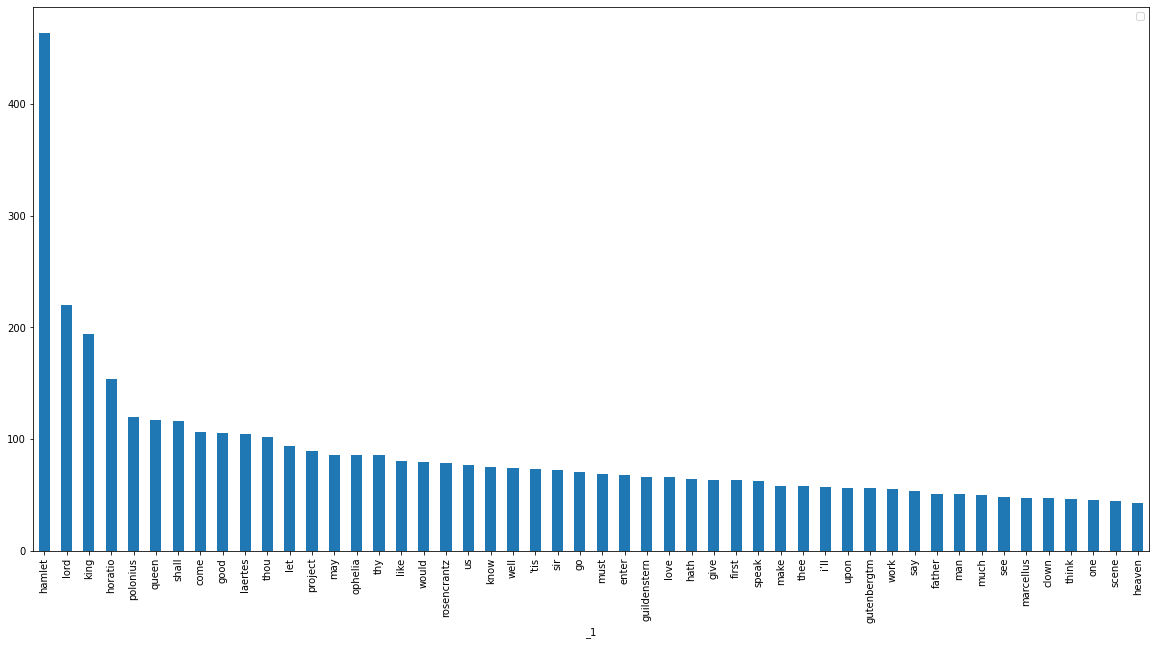

In [116]:
%matplotlib inline
df.select("_1","_2").toPandas()[:50].plot(kind='bar',x='_1',y='_2')
fig = plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(20)